In [1]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_mean_and_std(lst):
    return np.average(lst), np.std(lst)

def get_trust(array):
    return (np.exp(array)-np.exp(-array))/(np.exp(array)+np.exp(-array))

## 最优型与任务型

### 协作绩效

In [ ]:
# 低等信任
delta = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

In [3]:
task_counts = [x.task_count.sum()/20000 for x in results]
task_counts

[0.0026,
 0.0026,
 0.0024,
 0.0025,
 0.0026,
 0.0026,
 0.00265,
 0.00275,
 0.00255,
 0.00255]

In [4]:
get_mean_and_std(task_counts)

(0.00258, 8.717797887081345e-05)

In [5]:
# 高等信任
delta = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----


In [6]:
task_counts = [x.task_count.sum()/20000 for x in results]
task_counts

[0.0024]

In [7]:
get_mean_and_std(task_counts)

(0.0024, 0.0)

### 信任演化

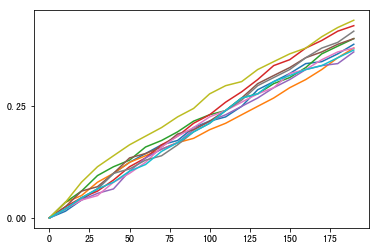

In [13]:
# 低等信任
deltas = 0.8
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

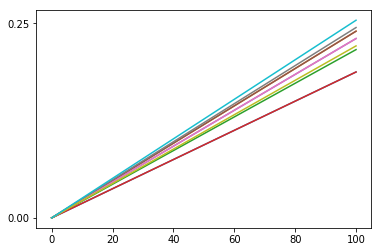

In [4]:
# 高等信任
delta = 0.2
ita = 1
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*100 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [ ]:
# 低等信任
delta = 0.8
ita = 1
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [ ]:
cvgs_1

In [ ]:
get_mean_and_std(cvgs_1)

In [ ]:
# 高等信任
deltas = 0.2
ita = 1
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [ ]:
cvgs_2

In [ ]:
get_mean_and_std(cvgs_2)

## 最优型与适应型

### 协作绩效

In [5]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [6]:
task_counts = [x.task_count.sum()/200 for x in results]
task_counts

[0.22, 0.245, 0.245, 0.24, 0.235, 0.24, 0.255, 0.24, 0.215, 0.255]

In [7]:
# 低等信任
get_mean_and_std(task_counts)

(0.23899999999999996, 0.01240967364599086)

In [13]:
# 高等信任
delta = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [14]:
task_counts = [x.task_count.sum()/200 for x in results]

In [15]:
# 高等信任
get_mean_and_std(task_counts)

(0.213, 0.015524174696260025)

### 信任演化

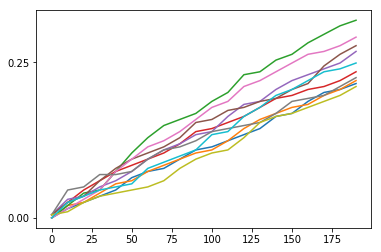

In [16]:
# 低等信任
delta = 0.8
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

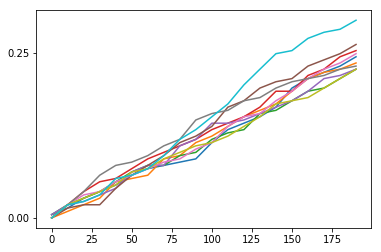

In [18]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [46]:
# 低等信任
deltas = 0.8
ita = 1
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [54]:
get_mean_and_std(cvgs_1)
'''
[0.927,
 0.9485,
 0.8697,
 0.93225,
 0.93265,
 0.70735,
 0.96765,
 0.97515,
 0.75745,
 0.97445]
'''

(0.8992150000000002, 0.08905090412230524)

In [49]:
# 高等信任
deltas = 0.2
ita = 1
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [52]:
get_mean_and_std(cvgs_2)
'''
[0.9783,
 0.719,
 0.68595,
 0.9807,
 0.67575,
 0.95115,
 0.75135,
 0.9932,
 0.9613,
 0.99455]
'''

(0.869125, 0.13344435778630734)

## 满意型与任务型

### 协作绩效

In [19]:
# 低等信任
delta = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [22]:
task_counts = [x.task_count.sum()/200 for x in results]
task_counts

[0.245, 0.255, 0.235, 0.255, 0.26, 0.255, 0.25, 0.275, 0.26, 0.26]

In [23]:
get_mean_and_std(task_counts)

(0.255, 0.010000000000000009)

In [24]:
# 高等信任
delta = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [25]:
task_counts = [x.task_count.sum()/200 for x in results]
task_counts

[0.245, 0.235, 0.26, 0.21, 0.26, 0.255, 0.255, 0.24, 0.26, 0.245]

In [26]:
# 高等信任
get_mean_and_std(task_counts)

(0.2465, 0.014840822079655836)

### 信任演化

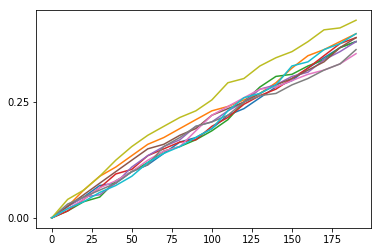

In [27]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

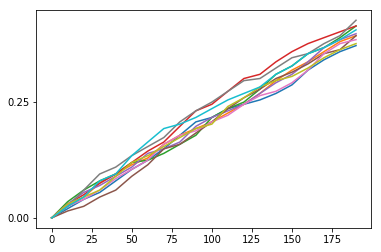

In [28]:
# 信任演化：高等
deltas = 0.2
ita = 0.5
w = 1

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [55]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 1

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [56]:
cvgs_1

[0.5486,
 0.9856,
 0.6041,
 0.6944,
 0.9061,
 0.7644,
 0.9735,
 0.96695,
 0.7876,
 0.3873]

In [59]:
get_mean_and_std(cvgs_1)
'''
[0.5486,
 0.9856,
 0.6041,
 0.6944,
 0.9061,
 0.7644,
 0.9735,
 0.96695,
 0.7876,
 0.3873]
'''

(0.761855, 0.19328767478812509)

In [ ]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 1

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [58]:
cvgs_2

[0.28695,
 0.8847,
 0.95165,
 0.5803,
 0.8327,
 0.47025,
 0.6966,
 0.71825,
 0.9768,
 0.59435]

In [60]:
get_mean_and_std(cvgs_2)
'''
[0.28695,
 0.8847,
 0.95165,
 0.5803,
 0.8327,
 0.47025,
 0.6966,
 0.71825,
 0.9768,
 0.59435]
'''

(0.6992550000000001, 0.20997471091776743)

## 满意型与适应型

### 协作绩效

In [29]:
# 低等信任
delta = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [30]:
task_counts = [x.task_count.sum()/200 for x in results]

In [31]:
# 低等信任
get_mean_and_std(task_counts)

(0.23899999999999996, 0.008306623862918075)

In [32]:
# 高等信任
delta = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    print('----%d----' % i)
    results.append(collaborate_rescue_1(delta, ita, w))

----0----
----1----
----2----
----3----
----4----
----5----
----6----
----7----
----8----
----9----


In [33]:
task_counts = [x.task_count.sum()/200 for x in results]

In [34]:
# 高等信任
get_mean_and_std(task_counts) 

(0.2015, 0.01397318861248212)

### 信任演化

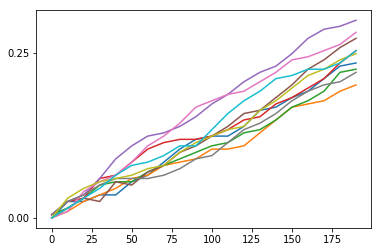

In [35]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

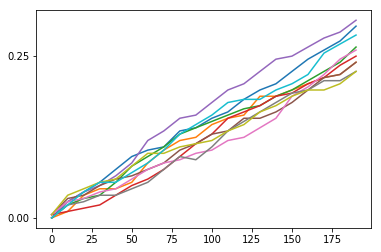

In [36]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

results = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.plot(get_trust(result.human_trust)[[x*10 for x in range(20)]], linestyle='-')

### 机器人算法收敛

In [61]:
# 低等信任
deltas = 0.8
ita = 0.5
w = 0.5

cvgs_1 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_1.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [65]:
get_mean_and_std(cvgs_1)
'''
[0.65835,
 0.8075,
 0.90785,
 0.6521,
 0.9148,
 0.8314,
 0.87855,
 0.9511,
 0.91385,
 0.99455]
'''

(0.851005, 0.11026773882237723)

In [63]:
# 高等信任
deltas = 0.2
ita = 0.5
w = 0.5

cvgs_2 = []
for i in range(10):
    result = collaborate_rescue_1(delta, ita, w)
    result.robot_q_1 = result.robot_q_1.apply(lambda x:float(x.split(',')[0]))
    cvgs_2.append(list(np.abs(result.robot_q_1 - result.robot_q_1.values[-1]) < 0.002).index(True)/20000)

In [66]:
get_mean_and_std(cvgs_2)
'''
[0.91265,
 0.4552,
 0.83695,
 0.9121,
 0.9807,
 0.82985,
 0.87455,
 0.67695,
 0.9769,
 0.91785]
'''

(0.83737, 0.15197643106745204)

## 画图

In [ ]:
'''
协作绩效

A 最优型人类 vs 任务型机器人
低等信任环境
0.258
高等信任环境
0.24
B 最优型人类 vs 顺从型机器人
低等信任环境
0.2389 
高等信任环境
0.213
C 满意型人类 vs 任务型机器人
低等信任环境
0.255
高等信任环境
0.2465
D 满意型人类 vs 顺从型机器人
低等信任环境
0.2389 
高等信任环境
0.2015

'''

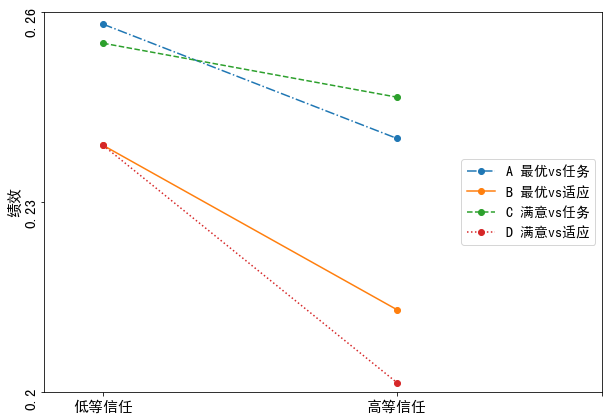

In [6]:
a = np.array([[[0.2, 0.258], [1.2, 0.24]],
             [[0.2, 0.2389 ], [1.2, 0.213]],
             [[0.2, 0.255], [1.2, 0.2465]],
             [[0.2, 0.2389], [1.2, 0.2015]]])

fig = plt.figure(figsize=(10,7))
plt.ylim(0.2, 0.26)
plt.xlim(0, 1)
plt.xticks([0.2, 1.2, 1.9], ['低等信任', '高等信任', ''],fontsize=15)
plt.yticks([0.2, 0.23, 0.26], [0.2, 0.23, 0.26], fontsize=15, rotation=90)
plt.plot(a[0][:, 0], a[0][:, 1], '-.', marker='o')
plt.plot(a[1][:, 0], a[1][:, 1], '-', marker='o')
plt.plot(a[2][:, 0], a[2][:, 1], '--', marker='o')
plt.plot(a[3][:, 0], a[3][:, 1], ':', marker='o')
plt.ylabel('绩效', fontsize=15)
# for i in range(4):
#     e = 0
#     if a[i, 0, 1] == 0.0972:
#         e = 0.004
#     if a[i, 0, 1] == 0.0951:
#         e = -0.009
#     plt.text(a[i,0,0],a[i,0,1]+e,a[i,0,1],ha='right', va='bottom', fontsize=15)
#     plt.text(a[i,1,0],a[i,1,1],a[i,1,1],ha='left', va='bottom', fontsize=15)

plt.legend(['A 最优vs任务', 'B 最优vs适应', 'C 满意vs任务', 'D 满意vs适应'], loc='center right', fontsize=14)
plt.show()